# Lab 7 - Clustering

We will create cluster (groups of records/patients) according to their speech features and analyze it. For this, we are going to use K-means with differente values of k to see the impact of the parameter.

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import numpy as np
from utils import graphFunctions as graph
import matplotlib.pyplot as plt
from utils import modelAnalyzesFunctions as analyzes

In [3]:
data: pd.DataFrame = pd.read_csv('../datasets/covtype_data_preparation.csv', sep=',', decimal='.')
copy_data = data.copy()
y: np.ndarray = copy_data.pop('Cover_Type').values
X: np.ndarray = copy_data.values
labels = pd.unique(y)

data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type-32,Soil_Type-33,Soil_Type-34,Soil_Type-35,Soil_Type-36,Soil_Type-37,Soil_Type-38,Soil_Type-39,Soil_Type-40,Cover_Type
0,0.546773,0.200000,0.454545,0.047960,0.272610,0.367290,0.937008,0.665354,0.161417,0.308518,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.637819,0.891667,0.090909,0.064424,0.223514,0.105381,0.803150,0.921260,0.665354,0.158929,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.716858,0.163889,0.287879,0.125268,0.232558,0.593790,0.905512,0.771654,0.354331,0.500209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.549775,0.133333,0.106061,0.021475,0.228682,0.437544,0.877953,0.885827,0.543307,0.157814,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.699850,0.519444,0.121212,0.336435,0.295866,0.360264,0.870079,0.968504,0.625984,0.191552,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


## K-means

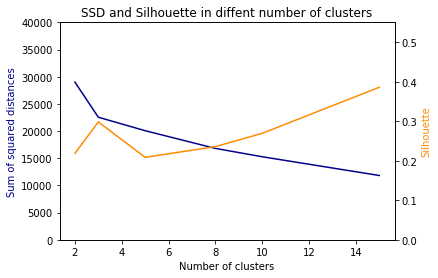

In [4]:
n_clusters = np.array([2, 3, 5, 8, 10, 15])

results = analyzes.kmeans(X, y, n_clusters, y_interval=(0, 40000), y_interval2=(0, 0.55))

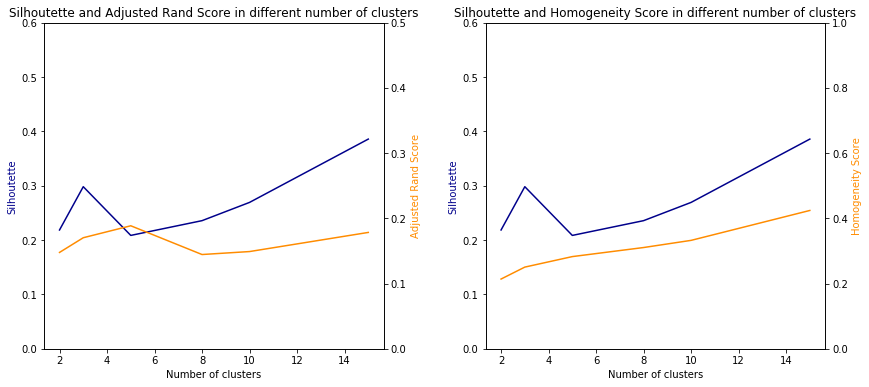

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
plt.subplots_adjust(wspace=0.3)
graph.double_line_chart_different_scales(ax[0], n_clusters, results[:, 1], results[:, 3], "Silhoutette and Adjusted Rand Score in different number of clusters", "Number of clusters", "Silhoutette", "Adjusted Rand Score", y_interval=(0, 0.6), y_interval2=(0,0.5))
graph.double_line_chart_different_scales(ax[1], n_clusters, results[:, 1], results[:, 4], "Silhoutette and Homogeneity Score in different number of clusters", "Number of clusters", "Silhoutette", "Homogeneity Score", y_interval=(0, 0.6), y_interval2=(0,1))

The "dummified fields" (Wilderness_Area and Soil_Type) separate the data so much that the Sum of squared distances became really high. So it will be tested without these features.

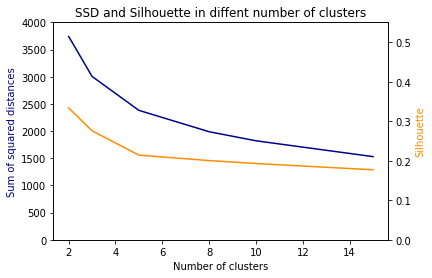

In [6]:
n_clusters = np.array([2, 3, 5, 8, 10, 15])

results_no_dum = analyzes.kmeans(X[:, 0:10], y, n_clusters, y_interval=(0, 4000), y_interval2=(0, 0.55))

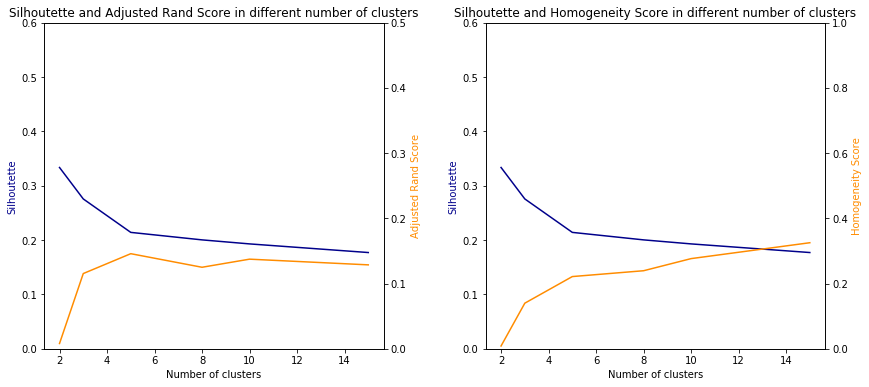

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
plt.subplots_adjust(wspace=0.3)
graph.double_line_chart_different_scales(ax[0], n_clusters, results_no_dum[:, 1], results_no_dum[:, 3], "Silhoutette and Adjusted Rand Score in different number of clusters", "Number of clusters", "Silhoutette", "Adjusted Rand Score", y_interval=(0, 0.6), y_interval2=(0,0.5))
graph.double_line_chart_different_scales(ax[1], n_clusters, results_no_dum[:, 1], results_no_dum[:, 4], "Silhoutette and Homogeneity Score in different number of clusters", "Number of clusters", "Silhoutette", "Homogeneity Score", y_interval=(0, 0.6), y_interval2=(0,1))

## Visualizing the result

Considering some different k, we will plot the resulting clusters using 2 components generated using PCA (Principal Component Analysis) as axis.

First, with the "dummified fields":

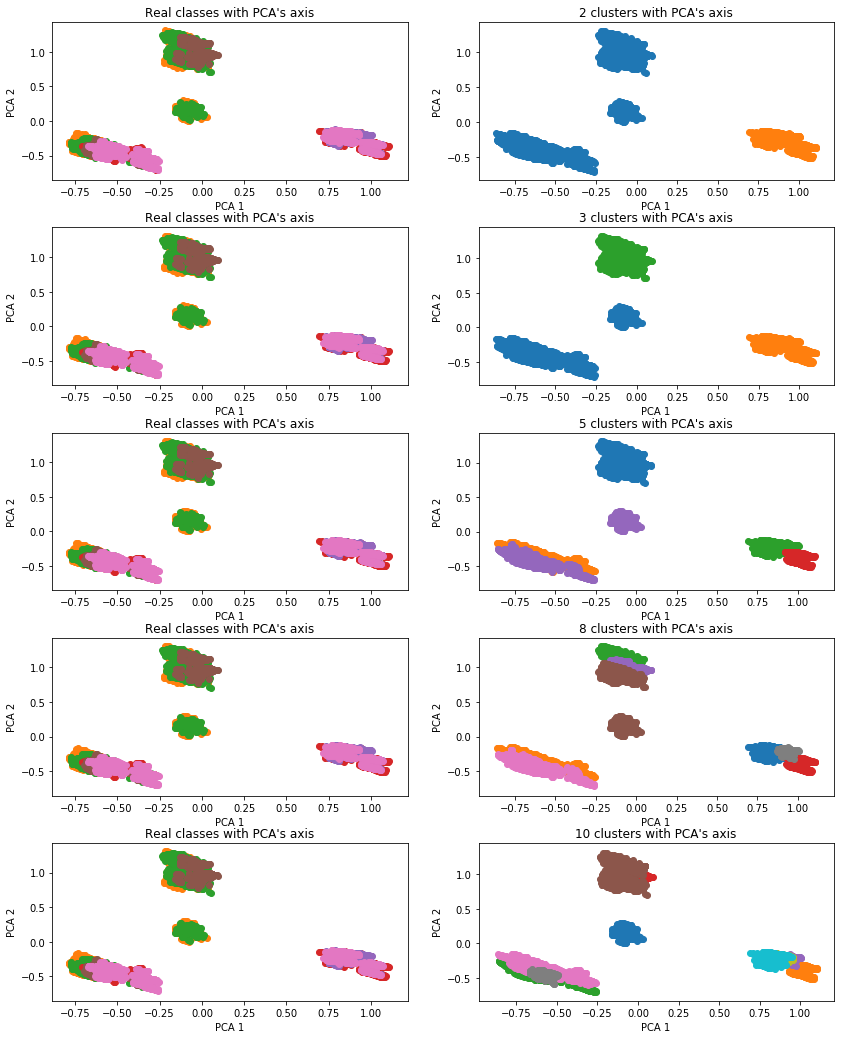

In [15]:
n_plot = [2, 3, 5, 8, 10]

analyzes.visualize_cluster_PCA(X, y, n_plot)

Now, without them:

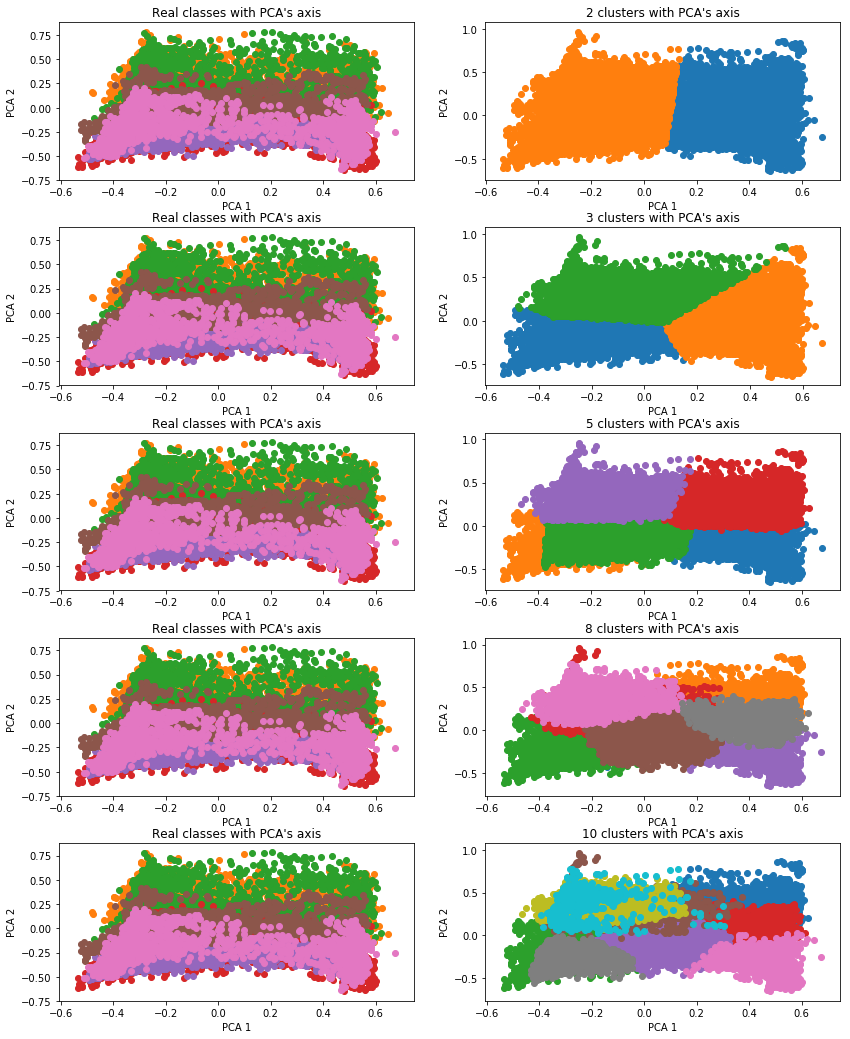

In [17]:
analyzes.visualize_cluster_PCA(X[:, 0:10], y, n_plot)

## With feature selection

We will try feature selection splitting both cases again.

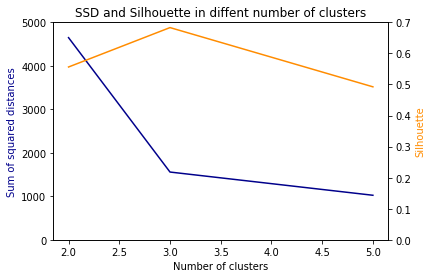

In [21]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector = SelectKBest(mutual_info_classif, k=6)
X_new = selector.fit_transform(X, y)

n_clusters = np.array([2, 3, 5])

results_fs = analyzes.kmeans(X_new, y, n_clusters, y_interval=(0, 5000), y_interval2=(0, 0.7))

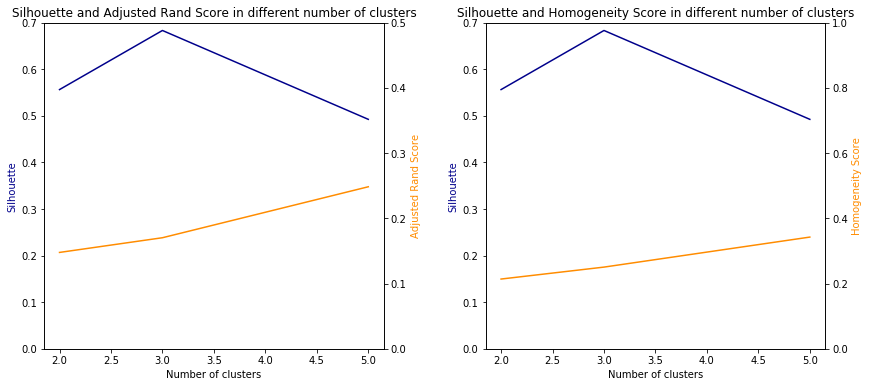

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
plt.subplots_adjust(wspace=0.3)
graph.double_line_chart_different_scales(ax[0], n_clusters, results_fs[:, 1], results_fs[:, 3], "Silhouette and Adjusted Rand Score in different number of clusters", "Number of clusters", "Silhouette", "Adjusted Rand Score", y_interval=(0, 0.70), y_interval2=(0,0.5))
graph.double_line_chart_different_scales(ax[1], n_clusters, results_fs[:, 1], results_fs[:, 4], "Silhouette and Homogeneity Score in different number of clusters", "Number of clusters", "Silhouette", "Homogeneity Score", y_interval=(0, 0.70), y_interval2=(0,1))

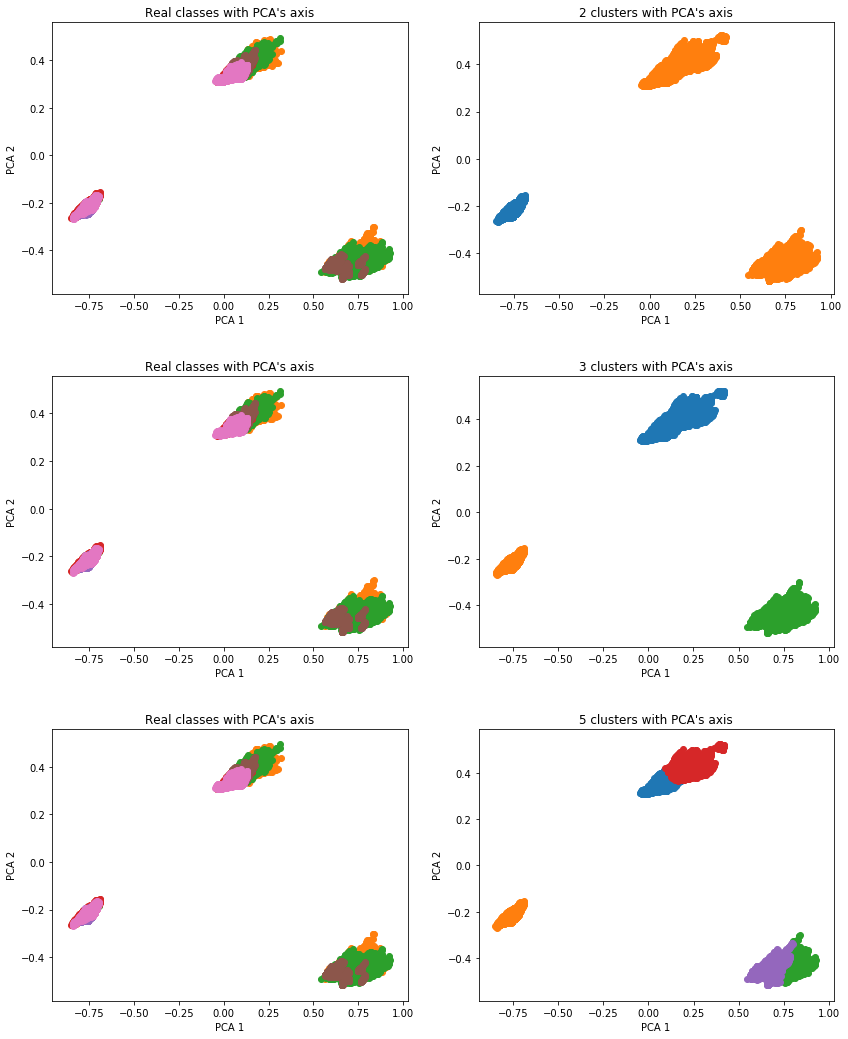

In [24]:
n_plot = [2, 3, 5]

analyzes.visualize_cluster_PCA(X_new, y, n_plot)

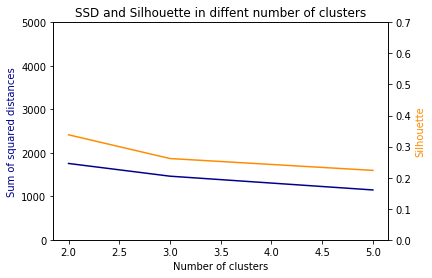

In [25]:
selector = SelectKBest(mutual_info_classif, k=6)
X_new = selector.fit_transform(X[:, 0:10], y)

n_clusters = np.array([2, 3, 5])

results_fs = analyzes.kmeans(X_new, y, n_clusters, y_interval=(0, 5000), y_interval2=(0, 0.7))

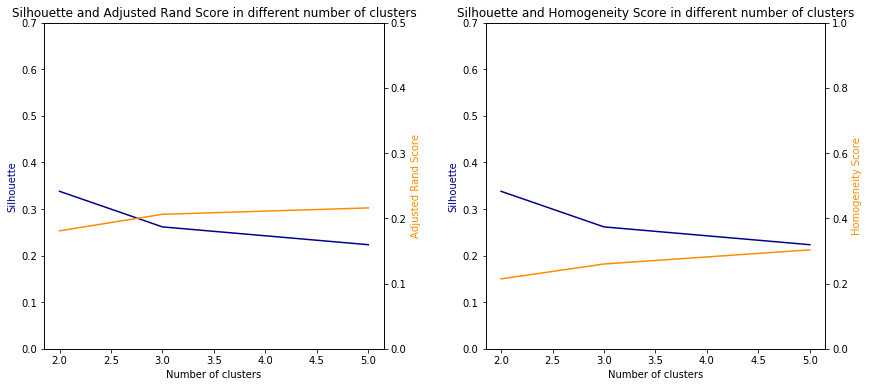

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
plt.subplots_adjust(wspace=0.3)
graph.double_line_chart_different_scales(ax[0], n_clusters, results_fs[:, 1], results_fs[:, 3], "Silhouette and Adjusted Rand Score in different number of clusters", "Number of clusters", "Silhouette", "Adjusted Rand Score", y_interval=(0, 0.70), y_interval2=(0,0.5))
graph.double_line_chart_different_scales(ax[1], n_clusters, results_fs[:, 1], results_fs[:, 4], "Silhouette and Homogeneity Score in different number of clusters", "Number of clusters", "Silhouette", "Homogeneity Score", y_interval=(0, 0.70), y_interval2=(0,1))

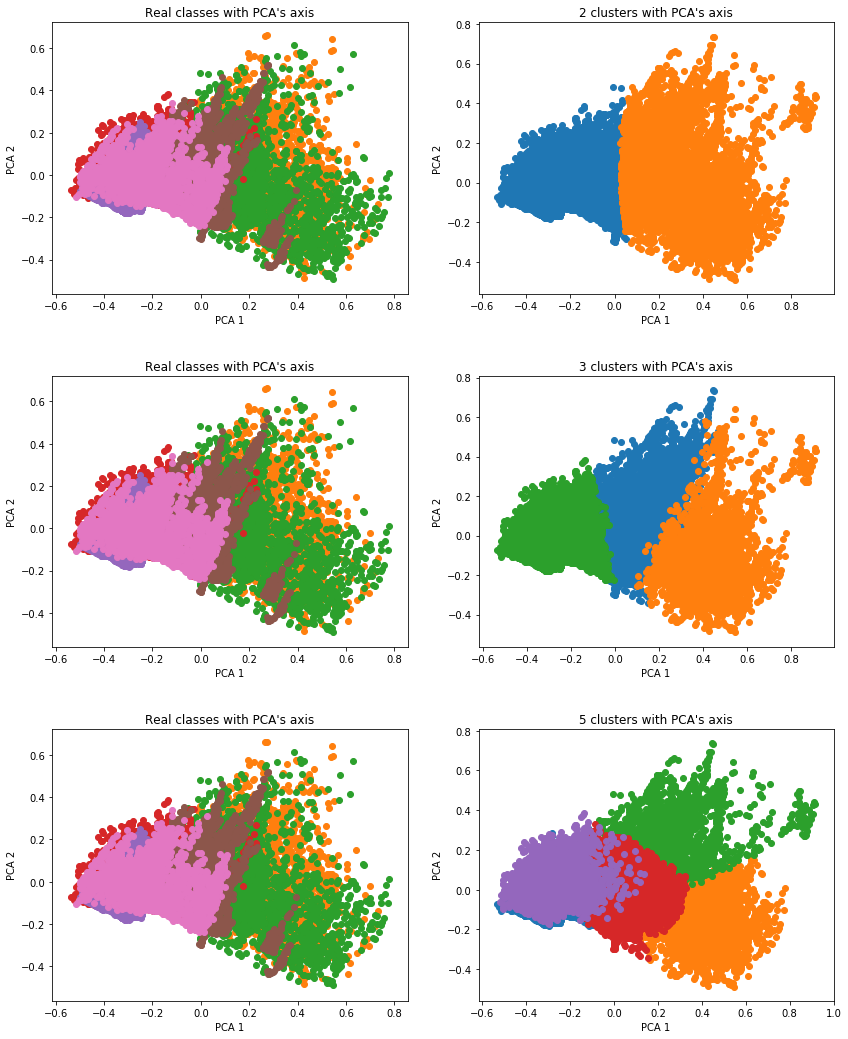

In [27]:
n_plot = [2, 3, 5]

analyzes.visualize_cluster_PCA(X_new, y, n_plot)

Even with the two components generated, most of the classes overlap each other.

The various possibilities for the target class results in lower metrics (adjusted rand score and homogeneity), therefore it's harder to consider the resulting cluster on the models without a more detailed analysis.